<a href="https://colab.research.google.com/github/sushgho/Msc-Project/blob/sushgho-patch-1/CNN_VGG_ResNet_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               30840     
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

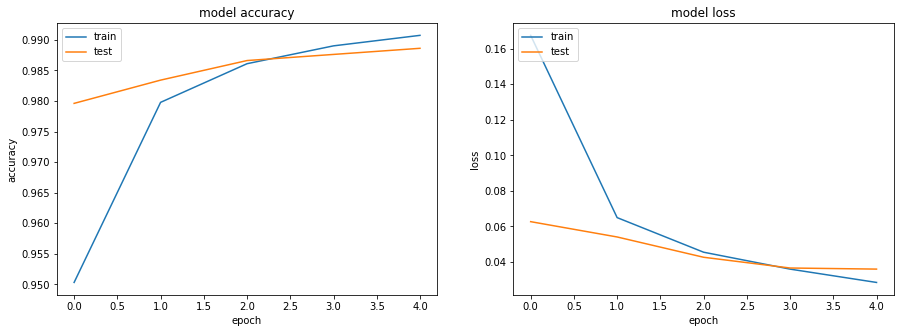

In [ ]:

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

#load the MNIST dataset from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Process data
X_train = X_train.reshape(-1, 28, 28, 1) # Expend dimension for 1 cahnnel image
X_test = X_test.reshape(-1, 28, 28, 1)  # Expend dimension for 1 cahnnel image
X_train = X_train / 255 # Normalize
X_test = X_test / 255 # Normalize

#One hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=6, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # second layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=16, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connection layer
    model.add(Flatten())
    model.add(Dense(120,activation = 'tanh'))
    model.add(Dense(84,activation = 'tanh'))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

LetNet_model = LetNet(28,28,1,10)
LetNet_model.summary()
LetNet_model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

#Strat training
History = LetNet_model.fit(X_train, y_train, epochs=5, batch_size=32,validation_data=(X_test, y_test))

#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [ ]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 93kB/s 
     |████████████████████████████████| 3.2MB 45.9MB/s 
     |████████████████████████████████| 491kB 50.1MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
pip install tflearn

     |████████████████████████████████| 102kB 2.7MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp36-none-any.whl size=128208 sha256=819fdd531f7c3a8f7fa0ce54354ee00919be8d978044ccf962da5c0fdb20a26f
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn








Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 256

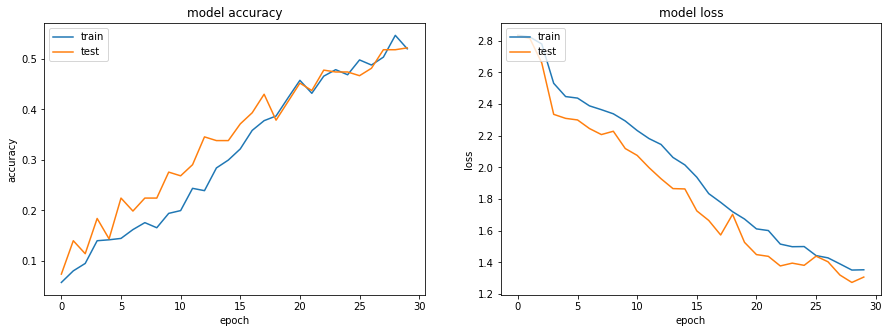

In [ ]:

import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam

#Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
x, y = oxflower17.load_data(one_hot=True)

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

#Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

#Build VGG model
def VGG(width, height, depth, classes):
    
    model = Sequential()
    
    #First Convolution and Pooling layer
    model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(width,height,depth),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Second Convolution and Pooling layer
    model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Three Convolution layer and Pooling Layer
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Fully connection layer
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    
    #Classfication layer
    model.add(Dense(classes,activation='softmax'))

    return model
  
VGG_model = VGG(224,224,3,17)
VGG_model.summary()
VGG_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

#Start training using dataaugumentation generator
History = VGG_model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),
                                      steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 30 )

#Plot Loss and Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

#GoogleNet


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_6[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 56, 56, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Epoch 1/30
68/68 [==============================] - 220s 3s/step - loss: 5.1014 - accuracy: 0.1186 - val_loss: 2.8033 - val_accuracy: 0.0478
Epoch 2/30
68/68 [==============================] - 217s 3s/step - loss: 3.0174 - accuracy: 0.2068 - val_loss: 2.7712 - val_accuracy: 0.0809
Epoch 3/30
68/68 [==============================] - 216s 3s/step - loss: 2.5708 - accuracy: 0.2371 - val_loss: 2.7354 - val_accuracy: 0.1103
Epoch 4/30
68/68 [==============================] - 216s 3s/step - loss: 2.2272 - accuracy: 0.3217 - val_loss: 2.6878 - val_accuracy: 0.1691
Epoch 5/30
68/68 [==============================] - 216s 3s/step - loss: 2.0316 - accuracy: 0.3621 - val_loss: 2.5570 - val_accuracy: 0.1434
Epoch 6/30
68/68 [==============================] - 215s 3s/step - loss: 1.8609 - accuracy: 0.4164 - val_loss: 2.1793 - val_accuracy: 0.2721
Epoch 7/30
68/68 [==============================] - 217s 3s/step - loss: 1.7027 - accuracy: 0.4660 - val_loss: 2.1004 - val_accuracy: 0.2868
Epoch 8/30
68

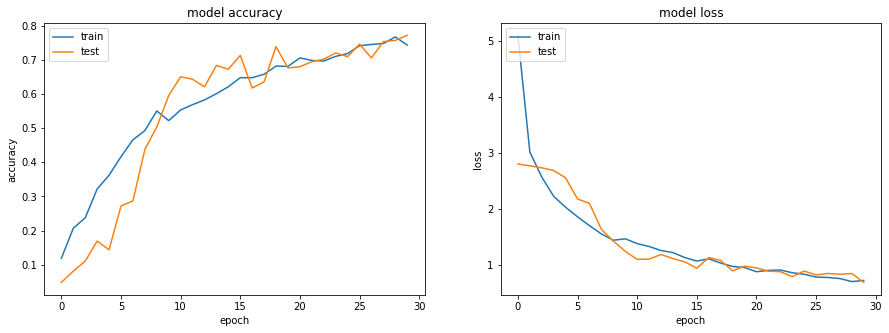

In [ ]:

import numpy as np
import keras.0.10
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout,BatchNormalization,AveragePooling2D,concatenate,Input, concatenate
from keras.models import Model,load_model
from keras.optimizers import Adam

#Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
x, y = oxflower17.load_data(one_hot=True)

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

#Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

#Define convolution with batchnromalization
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
  
#Define Inception structure
def Inception(x,nb_filter_para):
    (branch1,branch2,branch3,branch4)= nb_filter_para
    branch1x1 = Conv2D(branch1[0],(1,1), padding='same',strides=(1,1),name=None)(x)

    branch3x3 = Conv2D(branch2[0],(1,1), padding='same',strides=(1,1),name=None)(x)
    branch3x3 = Conv2D(branch2[1],(3,3), padding='same',strides=(1,1),name=None)(branch3x3)

    branch5x5 = Conv2D(branch3[0],(1,1), padding='same',strides=(1,1),name=None)(x)
    branch5x5 = Conv2D(branch3[1],(1,1), padding='same',strides=(1,1),name=None)(branch5x5)

    branchpool = MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(x)
    branchpool = Conv2D(branch4[0],(1,1),padding='same',strides=(1,1),name=None)(branchpool)

    x = concatenate([branch1x1,branch3x3,branch5x5,branchpool],axis=3)

    return x
  
#Build InceptionV1 model(GoogleNet)
def InceptionV1(width, height, depth, classes):
    
    inpt = Input(shape=(width,height,depth))

    x = Conv2d_BN(inpt,64,(7,7),strides=(2,2),padding='same')
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
    x = Conv2d_BN(x,192,(3,3),strides=(1,1),padding='same')
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

    x = Inception(x,[(64,),(96,128),(16,32),(32,)]) #Inception 3a 28x28x256
    x = Inception(x,[(128,),(128,192),(32,96),(64,)]) #Inception 3b 28x28x480
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x) #14x14x480

    x = Inception(x,[(192,),(96,208),(16,48),(64,)]) #Inception 4a 14x14x512
    x = Inception(x,[(160,),(112,224),(24,64),(64,)]) #Inception 4a 14x14x512
    x = Inception(x,[(128,),(128,256),(24,64),(64,)]) #Inception 4a 14x14x512
    x = Inception(x,[(112,),(144,288),(32,64),(64,)]) #Inception 4a 14x14x528
    x = Inception(x,[(256,),(160,320),(32,128),(128,)]) #Inception 4a 14x14x832
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x) #7x7x832

    x = Inception(x,[(256,),(160,320),(32,128),(128,)]) #Inception 5a 7x7x832
    x = Inception(x,[(384,),(192,384),(48,128),(128,)]) #Inception 5b 7x7x1024

    #Using AveragePooling replace flatten
    x = AveragePooling2D(pool_size=(7,7),strides=(7,7),padding='same')(x)
    x =Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000,activation='relu')(x)
    x = Dense(classes,activation='softmax')(x)
    
    model=Model(input=inpt,output=x)
    
    return model

InceptionV1_model = InceptionV1(224,224,3,17)
InceptionV1_model.summary()

InceptionV1_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])
History = InceptionV1_model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 30 )

#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [ ]:
pip install tflearn

     |████████████████████████████████| 102kB 6.1MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp36-none-any.whl size=128208 sha256=f2451c9a499ac96405b405e2324a0b51a243e6ce599fe0a7071454a678528f13
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


#ResNet

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout,BatchNormalization,AveragePooling2D,concatenate,Input, concatenate,add,GlobalAveragePooling2D
from keras.models import Model,load_model
from keras.optimizers import Adam

#Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
x, y = oxflower17.load_data(one_hot=True)

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

#Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

#Define convolution with batchnromalization
def Conv2d_BN(x, nb_filter,kernel_size, padding='same',strides=(1,1),name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None

    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
  
#Define Residual Block for ResNet34(2 convolution layers)
def Residual_Block(input_model,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut =False):
    x = Conv2d_BN(input_model,nb_filter=nb_filter,kernel_size=kernel_size,strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size,padding='same')
    
    #need convolution on shortcut for add different channel
    if with_conv_shortcut:
        shortcut = Conv2d_BN(input_model,nb_filter=nb_filter,strides=strides,kernel_size=kernel_size)
        x = add([x,shortcut])
        return x
    else:
        x = add([x,input_model])
        return x
    
#Built ResNet34
def ResNet34(width, height, depth, classes):
    
    Img = Input(shape=(width,height,depth))
    
    x = Conv2d_BN(Img,64,(7,7),strides=(2,2),padding='same')
    x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)  

    #Residual conv2_x ouput 56x56x64 
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=64,kernel_size=(3,3))
    
    #Residual conv3_x ouput 28x28x128 
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# need do convolution to add different channel
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=128,kernel_size=(3,3))
    
    #Residual conv4_x ouput 14x14x256
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# need do convolution to add different channel
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=256,kernel_size=(3,3))
    
    #Residual conv5_x ouput 7x7x512
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3))
    x = Residual_Block(x,nb_filter=512,kernel_size=(3,3))


    #Using AveragePooling replace flatten
    x = GlobalAveragePooling2D()(x)
    x = Dense(classes,activation='softmax')(x)
    
    model=Model(input=Img,output=x)
    return model  


resnet_model = ResNet34(224,224,3,17)
resnet_model.summary()

resnet_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])
History = resnet_model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 15 )


#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

Using TensorFlow backend.


ModuleNotFoundError: ignored

#VGG16

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam

#Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split
x, y = oxflower17.load_data(one_hot=True)

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True)

#Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

#Build VGG16Net model
def VGG16Net(width, height, depth, classes):
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(224,224,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(17,activation='softmax'))
    
    return model
  
VGG16_model = VGG16Net(224,224,3,17)
VGG16_model.summary()
VGG16_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

#Start training using dataaugumentation generator
History = VGG16_model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),
                                      steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 15 )

#Plot Loss and Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     49280     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0        